In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import os 
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt
"""
The Author:
Mehmet F BAGCI
"""

# The Survey Related Plots Created In This Script  
## 2 dictionary crated. One of them contains the question and the other one has the answers. 


In [2]:
# The dataset called here 
survey_data=pd.read_csv('survey_nonvote.txt').fillna(method='ffill')

In [3]:
survey_data.head()

,RespId,weight,Q1,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q2_7,...,Q30,Q31,Q32,Q33,ppage,educ,race,gender,income_cat,voter_category
0,470001,0.7516,1,1,1,2,4,1,4,2,...,2,NaN,1.0,NaN,73,College,White,Female,$75-125k,always
1,470002,1.0267,1,1,2,2,3,1,1,2,...,3,NaN,1.0,1.0,90,College,White,Female,$125k or more,always
2,470003,1.0844,1,1,1,2,2,1,1,2,...,2,NaN,2.0,1.0,53,College,White,Male,$125k or more,sporadic
3,470007,0.6817,1,1,1,1,3,1,1,1,...,2,NaN,1.0,1.0,58,Some college,Black,Female,$40-75k,sporadic
4,480008,0.9910,1,1,1,-1,1,1,1,1,...,1,-1.0,1.0,1.0,81,High school or less,White,Male,$40-75k,always


In [4]:
# A dictionary created which contains the potantional answers  
answers_file=open('answers_sur.txt','r')
answers_lines=answers_file.readlines()
dictionary_ans=dict()

list_qNum=['0']
for line in answers_lines:
    if line[0]=='Q':
        list_qNum.append(line[1:].replace('\n',''))

key_tra=''
count=0
val_lines=''
for line in answers_lines:
    if line[0]=='Q':
        dictionary_ans['Q'+list_qNum[count]]=val_lines
        count=count+1
        key_tra=line
        val_lines=''
    else:
        val_lines=val_lines+line
dictionary_ans['Q'+list_qNum[count]]=val_lines

In [5]:
print(dictionary_ans['Q4'])


1. A significant impact
2. Somewhat of an impact
3. Just a slight impact
4. No impact at all



In [6]:
# The creating the dictionary for questions. 
question_file=open('questions.txt','r')
question_lines=question_file.readlines()
dictionary_question=dict()
count=0

list_qNum=[]
for x in range(len(question_lines)-2):
    if question_lines[x][0]=='Q' and question_lines[x+1][0]=='Q':
        qnum=question_lines[x][:4].replace('.','').replace(' ','')
        list_qNum.append(qnum)
        dictionary_question[qnum]=question_lines[x]
    elif question_lines[x+1][0]!='Q':
        flag_num=question_lines[x][:4].replace('.','').replace(' ','')
        t=str(flag_num+'_'+ question_lines[x+1][:3].replace('.','').replace(' ',''))
        list_qNum.append(t)
        dictionary_question[t]=str(question_lines[x]+question_lines[x+1])

In [7]:
dictionary_question

{'Q1': 'Q1. Are you a U.S. citizen?\n',
 'Q2_1': 'Q2. In your view, how important are each of the following to being a good American?\n1. Voting in elections\n',
 'Q2_2': 'Q2. In your view, how important are each of the following to being a good American?\n2. Serving on a jury\n',
 'Q2_3': 'Q2. In your view, how important are each of the following to being a good American?\n3. Following what happens in government and politics\n',
 'Q2_4': 'Q2. In your view, how important are each of the following to being a good American?\n4. Displaying the American flag\n',
 'Q2_5': 'Q2. In your view, how important are each of the following to being a good American?\n5. Participating in the U.S. Census every ten years\n',
 'Q2_6': 'Q2. In your view, how important are each of the following to being a good American?\n6. Knowing the Pledge of Allegiance\n',
 'Q2_7': 'Q2. In your view, how important are each of the following to being a good American?\n7. Supporting the military\n',
 'Q2_8': 'Q2. In your v

In [8]:
set(survey_data['voter_category'])

{'always', 'rarely/never', 'sporadic'}

# The dictionaries: 
-question_ans: takes the column name and potantional answers
    
-dictionary_ans: takes the column name and gives the question  

In [9]:
dictionary_question['Q19_9']

'Q19. Which of the following do you think would get more people to vote in national elections?\n9. Having more candidates to choose from\n'

In [10]:
q19_columns=[]
for x in range(1,10):

    q19_columns.append(dictionary_question['Q19_'+str(x)].split('\n')[1][2:])

In [11]:
survey_data.groupby(['Q19_'+str(9),'voter_category']).count()['RespId']

Q19_9  voter_category
-1     always            1465
       rarely/never      1012
       sporadic          1943
 1     always             346
       rarely/never       439
       sporadic           631
Name: RespId, dtype: int64

In [12]:
survey_data.groupby(['Q19_'+str(x),'voter_category'])

In [13]:
q19_ans_3=np.zeros([3,9])
q19_ans_1=np.zeros([9,1])
survey_data.groupby(['Q19_10']).count()['RespId'].values[0]

for x in range(1,10):
    q19_ans_1[x-1]=survey_data.groupby(['Q19_'+str(x)]).count()['RespId'].values[1]/(survey_data.groupby(['Q19_'+str(x)]).count()['RespId'].values[0]+survey_data.groupby(['Q19_'+str(x)]).count()['RespId'].values[1])
    for t in range(3):
        q19_ans_3[t,x-1]=survey_data.groupby(['Q19_'+str(x),'voter_category']).count()['RespId'].values[t+3]/(survey_data.groupby(['Q19_'+str(x),'voter_category']).count()['RespId'].values[t+3]+survey_data.groupby(['Q19_'+str(x),'voter_category']).count()['RespId'].values[t])
    dictionary_question['Q19_'+str(x)]


In [14]:
df_q19_3=pd.DataFrame(q19_ans_3,columns=q19_columns,index=['Always','Never','Sporadic'])


In [15]:
df_q19_3.loc['Never'].sort_values

<bound method Series.sort_values of  More outreach to ordinary Americans from candidates or elected officials    0.248105
 More information about the candidates from unbiased sources                 0.458994
 Making Election Day a national holiday                                      0.485872
 Being automatically registered to vote                                      0.383184
 Automatically receiving a ballot in the mail                                0.376981
 Being able to vote in-person before Election Day                            0.416265
 Being able to register and vote on the same day                             0.382495
 Being able to vote by phone or online                                       0.339766
 Having more candidates to choose from                                       0.302550
Name: Never, dtype: float64>

In [16]:
df_q19_1=pd.DataFrame(df_q19_3.loc['Never'].sort_values(),index=q19_columns)

In [17]:
df_q19_3.loc['Never']

 More outreach to ordinary Americans from candidates or elected officials    0.248105
 More information about the candidates from unbiased sources                 0.458994
 Making Election Day a national holiday                                      0.485872
 Being automatically registered to vote                                      0.383184
 Automatically receiving a ballot in the mail                                0.376981
 Being able to vote in-person before Election Day                            0.416265
 Being able to register and vote on the same day                             0.382495
 Being able to vote by phone or online                                       0.339766
 Having more candidates to choose from                                       0.302550
Name: Never, dtype: float64

In [18]:
plt.rcParams.update({'font.size': 32})



<AxesSubplot:>

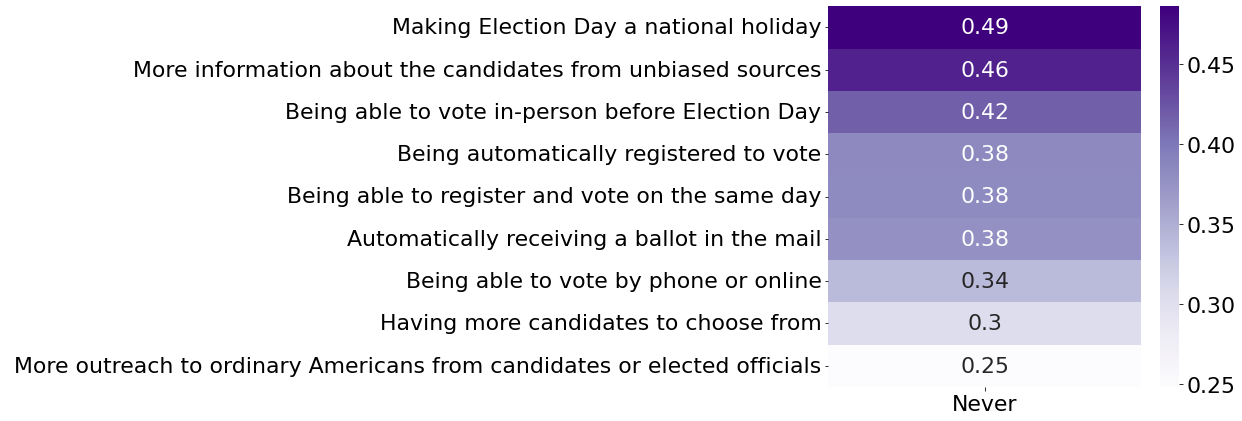

In [19]:
plt.figure(figsize=[7,7])
plt.rcParams.update({'font.size': 22})

sns.heatmap(df_q19_1.sort_values(by="Never", ascending=False),cmap='Purples',annot=True)